# Labyrinthe

## Génération d'un Labyrinthe aléatoire

Largeur du labyrinthe:  15
Hauteur du labyrinthe:  10


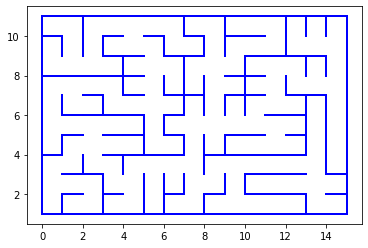

In [62]:
import random
import matplotlib.pyplot as plt
import sys
from collections import defaultdict



#Choisir la longueur et la hauteur du labyrinthe.
width = int(input("Largeur du labyrinthe:  "))  
height = int(input("Hauteur du labyrinthe:  ")) 

class Labyrinthe:
    def __init__(self, width, height):
        self.width=width
        self.height=height
        self.cells=[]
        zone=0
        num_cell=0
        self.graph0=defaultdict(list)
        #self.graph = defaultdict(lambda: defaultdict(int))
        
        #construction des cellules fermées et de la liste des zones initiales
        #origine en haut à gauche
        for i in range(height):
            self.cells.append([])
            for j in range(width):
                #chaque cell est entièrement fermée
                #False = on passe pas = mur fermé ; True = on peut passer = mur ouvert
                self.cells[i].append({'N':False, 'E':False, 'S':False, 'W':False, 'zone':zone, 'num_cell': num_cell})#chaque zone est unique au départ zone=i*width+j
                zone+=1
                num_cell+=1
        self.n_zones=width*height
        self.generer()


    def fusionner(self, i1, j1, dir):
        #i2,j2 et dir2 sont associés à la case de la direction opposée
        if dir=='N':
            i2=i1-1;j2=j1;dir2='S'
        elif dir=='S':
            i2=i1+1;j2=j1;dir2='N'
        elif dir=='W':
            i2=i1;j2=j1-1;dir2='E'
        elif dir=='E':
            i2=i1;j2=j1+1;dir2='W'

        if(i2>=0 and i2<self.height and j2>=0 and j2<self.width):
            zone1=self.cells[i1][j1]['zone']
            zone2=self.cells[i2][j2]['zone']
            if zone1!=zone2:
                self.cells[i1][j1][dir]=True
                self.cells[i2][j2][dir2]=True
                self.graph0[str(self.cells[i1][j1]['num_cell'])].append(str(self.cells[i2][j2]['num_cell']))
                self.graph0[str(self.cells[i2][j2]['num_cell'])].append(str(self.cells[i1][j1]['num_cell']))
                #print(self.graph0)
                #fusion des zones :
                for i in range(self.height):
                    for j in range(self.width):
                        if self.cells[i][j]['zone']==zone2:
                            self.cells[i][j]['zone']=zone1
                self.n_zones-=1;#permettra de s'arrêter sans vider toute la pile
                return zone1,  self.graph0
        return False
        


    def generer(self):
        #cells à traiter
        pile_cells=[]
        for dir in ['N', 'E', 'S', 'W']:
            for i in range(self.height):
                for j in range(self.width):
                    pile_cells.append((i,j,dir))
        random.shuffle(pile_cells)
        while(len(pile_cells)>0 and self.n_zones>1):
            (i,j,dir)=pile_cells.pop()
            self.fusionner(i,j,dir)
            #décommenter ci-dessous pour visualiser les étapes :
            #self.print(True)
        return self.cells
    def print_plot(self):
        for i in range(self.height):
            y=self.height - i
            color="b"
            for j in range(self.width):
                x=j
                for dir in ['N', 'E', 'S', 'W' ]:
                    if not self.cells[i][j]['N']:
                        plt.plot([x,x+1], [y+1,y+1], color)
                    if not self.cells[i][j]['E']:
                        plt.plot([x+1,x+1], [y,y+1],color)
                    if not self.cells[i][j]['S']:
                        plt.plot([x,x+1], [y,y],color)
                    if not  self.cells[i][j]['W']:
                        #print("plot gauche")
                        plt.plot([x,x], [y,y+1],color)
        plt.show()

    #labels peut prendre 3 formes :
    #True : imprime les zones de la méthode générer
    #tableau T de taille height par width où T[i][j] est la valeur affichée dans la cellule (i,j)
    def print(self, labels=False):
        from math import floor
        #alias :
        w=self.width;h=self.height;c=self.cells;
        #si on imprime les labels, il faut élargir la taille des couloirs
        if(labels==True):
            labels=[ [ c[i][j]['zone'] for i in range(h) ] for j in range(w) ]

        if(labels):
            len_lbl=max([ max([ len(str(labels[i][j])) for i in range(h) ]) for j in range(w) ])+1
        inters=[' ','╴','╷', '┐','╶','─','┌','┬','╵','┘','│','┤','└','┴','├','┼']
        t=""
        #la grille des intersections de cases est de taille (N+1)(M+1)
        for i in range(h+1):
            interligne=""
            for j in range(w+1):
                #up, right, bottom, left : les 4 parties de la croix "┼" #False = mur, True = pas mur
                #Coins et bords:
                up=False if i==0 else None
                left=False if j==0 else None
                right=False if j==w else None
                bottom=False if i==h else None
                if j==w:
                    if up==None:up=not c[i-1][j-1]['E']
                    if bottom==None:bottom=not c[i][j-1]['E']
                if i==h:
                    bottom=False
                    if right==None:right=not c[i-1][j]['S']
                    if left==None:left=not c[i-1][j-1]['S']
                #intérieur :
                if up==None:up=not c[i-1][j]['W']
                if right==None:right=not c[i][j]['N']
                if bottom==None:bottom=not c[i][j]['W']
                if left==None:left=not c[i][j-1]['N']
                #-> mot binaire à 4 bits. 16 cas qu'on a mis dans l'ordre dans la liste inters
                #indice inters
                k=-up*8+right*4+bottom*2+left
                if not labels:
                    #espacement horizontal supplémentaire
                    sep= "─" if left else " "
                    t+=sep+inters[k]
                    if j==self.width:t+="\n"
                else:
                    sep= (len_lbl+2)*"─" if right else (len_lbl+2)*" "


                    lbl=labels[i][j] if i<self.height and j<self.width else ""

                    len_sp_left=floor((len_lbl - len(str(lbl)))/2)
                    len_sp_right=len_lbl-len(str(lbl))-len_sp_left
                    txt_lbl=str(lbl)
                    interligne+=("│" if bottom else " ")+" "*(len_sp_left+1)+txt_lbl+" "*(len_sp_right+1)
                    t+=inters[k]+sep
                    if j==self.width:
                        t+="\n" + interligne + "\n"
        print(t)


laby = Labyrinthe(width,height)
#laby.print()
#laby.print(True)
laby.print_plot()
G = laby.graph0


## Convertir en dictionnaire en ajoutant le poid = 1 pour chaque clé

In [65]:
import itertools



# convertir le resultats de la class labyr
def convert_dict(G):
    keys=[]
    dictionnaire = {}
    for cle, val in G.items():
        liste_norme = [1 for i in range(len(val))]
        list_dict_object = itertools.zip_longest(val, liste_norme)
        list_dict = dict(list_dict_object)
        dictionnaire[cle]=list_dict
    return dictionnaire
    
Graphe = convert_dict(G)
Graphe

{'19': {'20': 1, '4': 1, '18': 1},
 '20': {'19': 1, '35': 1},
 '28': {'29': 1, '13': 1, '27': 1},
 '29': {'28': 1, '14': 1, '44': 1},
 '121': {'120': 1, '122': 1},
 '120': {'121': 1, '105': 1, '135': 1},
 '4': {'3': 1, '5': 1, '19': 1},
 '3': {'4': 1, '2': 1},
 '35': {'36': 1, '34': 1, '50': 1, '20': 1},
 '36': {'35': 1, '51': 1},
 '17': {'2': 1, '32': 1},
 '2': {'17': 1, '3': 1},
 '123': {'108': 1, '124': 1},
 '108': {'123': 1, '107': 1},
 '97': {'82': 1, '112': 1},
 '82': {'97': 1, '81': 1, '83': 1, '67': 1},
 '118': {'117': 1, '103': 1, '133': 1},
 '117': {'118': 1, '116': 1},
 '68': {'83': 1, '53': 1},
 '83': {'68': 1, '98': 1, '82': 1, '84': 1},
 '38': {'23': 1, '37': 1, '53': 1, '39': 1},
 '23': {'38': 1, '8': 1},
 '105': {'120': 1, '106': 1},
 '30': {'15': 1, '31': 1},
 '15': {'30': 1},
 '52': {'37': 1},
 '37': {'52': 1, '38': 1},
 '109': {'124': 1, '110': 1},
 '124': {'109': 1, '123': 1, '139': 1},
 '34': {'35': 1},
 '132': {'133': 1, '131': 1},
 '133': {'132': 1, '134': 1, '11

## Représentation du Graphe obtenu à partir du dictionnaire

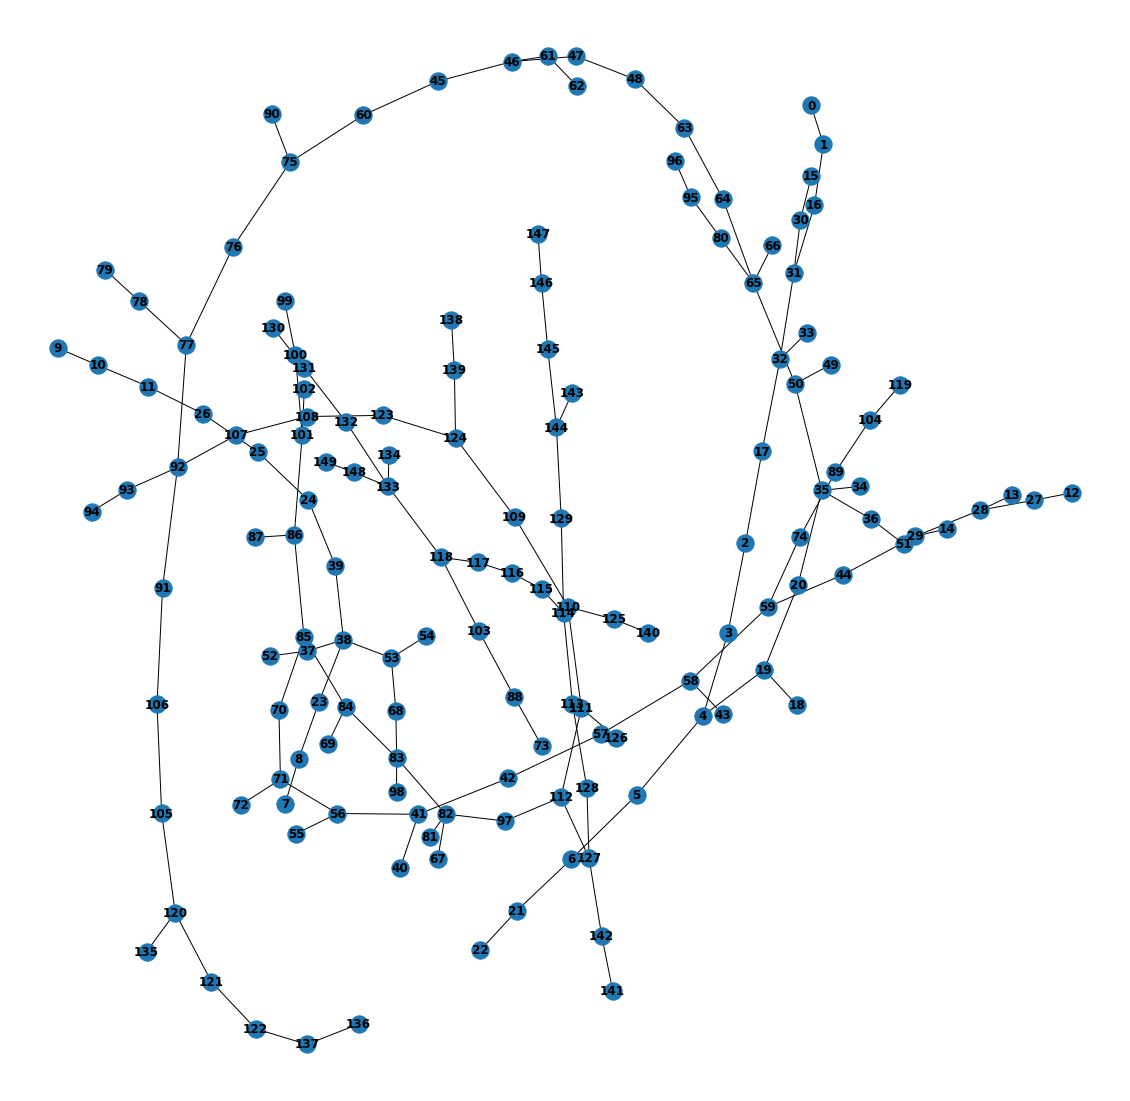

In [67]:
import networkx as nx
g = nx.Graph()
for i, j in Graphe.items():
    for k in j:
        g.add_edge( i,k )
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(20,20))
nx.draw(g, ax = ax, with_labels=True, font_weight='bold')

## Utiliser l'algorithme de dijkstra pour avoir le chemin (depart, arrivée) du graphe

In [81]:
from math import inf



def mini(listeSommets, marque):
    """
    Renvoie le sommet de listeSommets
    ayant la plus petite marque.
    """
    marquePlusPetite = inf
    for s in listeSommets:
        if marque[s] < marquePlusPetite:
            marquePlusPetite = marque[s]
            sommetPlusPetit = s
    return sommetPlusPetit




def dijkstra(graphe, depart, arrivee):

    # initialisation
    marque = {}
    for sommet in graphe: marque[sommet] = inf
    marque[depart] = 0

    non_selectionnes = [sommet for sommet in graphe]

    pere = {}
    pere[depart] = None

    # boucle principale:
    while non_selectionnes:
        # sélection:
        s = mini(non_selectionnes, marque)
        if s == arrivee: break
        non_selectionnes.remove(s)

        # mise à jour des voisins du sommet sélectionné:
        VoisinsAVisiter = [sommet for sommet in graphe[s] if sommet in non_selectionnes]
        for sommet in VoisinsAVisiter:
            p = marque[s] + graphe[s][sommet]
            if p < marque[sommet]:
                marque[sommet] = p
                pere[sommet] = s
    #print("p =",pere)
    #print("marque=",marque)
    return marque, pere


def affichageCheminMin(graphe, depart, arrivee):
    distance, pere = dijkstra(graphe, depart, arrivee)
    #print("La distance de {} à {} est de longueur {}.".format(depart, arrivee, distance[arrivee]))
    chemin = arrivee
    sommet = arrivee
    while pere[sommet] != None:
        chemin = pere[sommet] +','+ chemin
        sommet = pere[sommet]
    print()
    print("Le chemin de {} à {} est : \n{}.".format(depart, arrivee,chemin))
    #print(type(chemin))
    return chemin



chemin =affichageCheminMin(Graphe,'9', '2')
print()
#print("Le chemin de {} à {}: {}.".format(depart, arrivee,chemin))



Le chemin de 9 à 2 est : 
9,10,11,26,25,24,39,38,53,68,83,82,97,112,111,110,109,124,123,108,107,92,77,76,75,60,45,46,47,48,63,64,65,50,35,20,19,4,3,2.



### 